In [3]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [4]:
data = pd.read_csv('data.csv')

data.drop(columns=['Day'],inplace=True)
print (data.head())
print ('\n Data Types:')
print (data.dtypes)

         Date  Weight
0  2019-01-01     646
1  2019-01-02     556
2  2019-01-03     621
3  2019-01-04     377
4  2019-01-05     200

 Data Types:
Date      object
Weight     int64
dtype: object


In [5]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m-%d')

data = pd.read_csv('data.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)
data.drop(columns=['Day'],inplace=True)
data1 = pd.read_csv('data1.csv', parse_dates=['Date'], index_col='Date',date_parser=dateparse)


print (data.head())
print(data.dtypes)

            Weight
Date              
2019-01-01     646
2019-01-02     556
2019-01-03     621
2019-01-04     377
2019-01-05     200
Weight    int64
dtype: object


In [6]:
data.index
ts = data['Weight']
ts.head(10)

Date
2019-01-01    646
2019-01-02    556
2019-01-03    621
2019-01-04    377
2019-01-05    200
2019-01-06     25
2019-01-07    117
2019-01-08    555
2019-01-09    502
2019-01-10    789
Name: Weight, dtype: int64

/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


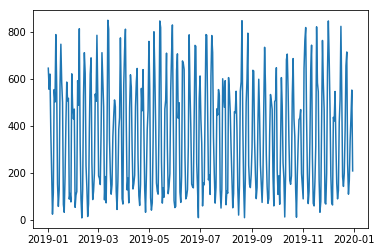

In [7]:
plt.plot(ts)

In [8]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(30).mean()
    rolstd = timeseries.rolling(30).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

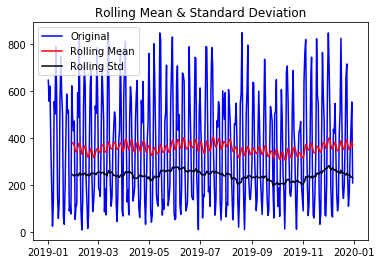

Results of Dickey-Fuller Test:
Test Statistic                -8.022920e+00
p-value                        2.053319e-12
#Lags Used                     1.000000e+01
Number of Observations Used    3.530000e+02
Critical Value (1%)           -3.449011e+00
Critical Value (5%)           -2.869763e+00
Critical Value (10%)          -2.571151e+00
dtype: float64


In [9]:
test_stationarity(ts)

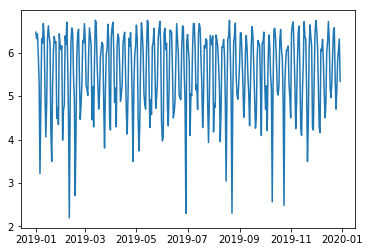

In [10]:
ts_log = np.log(ts)
plt.plot(ts_log)

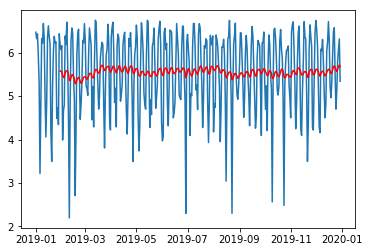

In [11]:
moving_avg = ts_log.rolling(30).mean()
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [12]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(30)

Date
2019-01-01        NaN
2019-01-02        NaN
2019-01-03        NaN
2019-01-04        NaN
2019-01-05        NaN
2019-01-06        NaN
2019-01-07        NaN
2019-01-08        NaN
2019-01-09        NaN
2019-01-10        NaN
2019-01-11        NaN
2019-01-12        NaN
2019-01-13        NaN
2019-01-14        NaN
2019-01-15        NaN
2019-01-16        NaN
2019-01-17        NaN
2019-01-18        NaN
2019-01-19        NaN
2019-01-20        NaN
2019-01-21        NaN
2019-01-22        NaN
2019-01-23        NaN
2019-01-24        NaN
2019-01-25        NaN
2019-01-26        NaN
2019-01-27        NaN
2019-01-28        NaN
2019-01-29        NaN
2019-01-30    0.60066
Name: Weight, dtype: float64

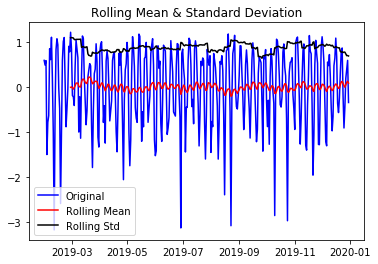

Results of Dickey-Fuller Test:
Test Statistic                  -5.517695
p-value                          0.000002
#Lags Used                      13.000000
Number of Observations Used    321.000000
Critical Value (1%)             -3.450887
Critical Value (5%)             -2.870586
Critical Value (10%)            -2.571590
dtype: float64


In [13]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

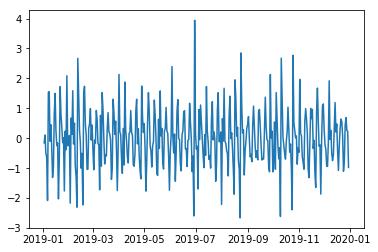

In [14]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)


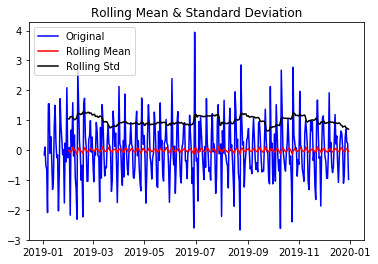

Results of Dickey-Fuller Test:
Test Statistic                -8.975662e+00
p-value                        7.544360e-15
#Lags Used                     1.500000e+01
Number of Observations Used    3.470000e+02
Critical Value (1%)           -3.449337e+00
Critical Value (5%)           -2.869906e+00
Critical Value (10%)          -2.571227e+00
dtype: float64


In [15]:
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

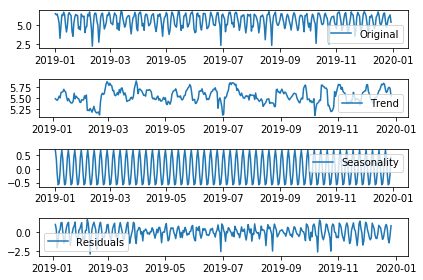

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

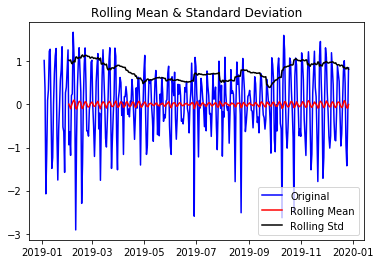

Results of Dickey-Fuller Test:
Test Statistic                -9.276478e+00
p-value                        1.284919e-15
#Lags Used                     1.700000e+01
Number of Observations Used    3.400000e+02
Critical Value (1%)           -3.449730e+00
Critical Value (5%)           -2.870079e+00
Critical Value (10%)          -2.571319e+00
dtype: float64


In [17]:
ts_log_decompose = residual
ts_log_decompose.dropna(inplace=True)
test_stationarity(ts_log_decompose)

In [18]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

In [19]:
lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function')

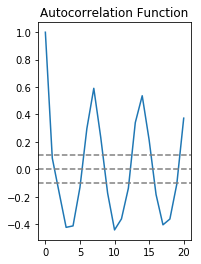

In [20]:
#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

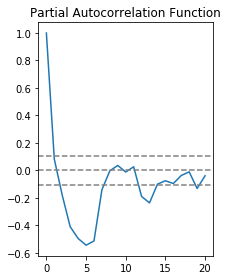

In [21]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

In [22]:
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(data, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4803.377, BIC=4822.681, Fit time=2.013 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5109.472, BIC=5117.194, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5058.366, BIC=5073.809, Fit time=0.609 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4874.394, BIC=4889.837, Fit time=0.667 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4804.092, BIC=4827.257, Fit time=2.332 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5023.326, BIC=5038.769, Fit time=0.285 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=4787.008, BIC=4810.173, Fit time=4.097 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=4873.442, BIC=4892.745, Fit time=4.245 seconds
Fit ARIMA: order=(2, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_orde

In [23]:
train = data.loc['2019-01-01':'2019-08-31']
test = data1.loc['2019-08-31':]

In [24]:
stepwise_model.fit(train)

ARIMA(callback=None, disp=0, maxiter=None, method=None, order=(1, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(2, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend=None,
   with_intercept=True)

In [25]:
future_forecast = stepwise_model.predict(n_periods=487)
future_forecast=future_forecast.round().astype(int)


In [26]:
prediction_frame={'Date':test.index,'Forecast':future_forecast}
df1=pd.DataFrame(prediction_frame,columns=['Date','Forecast'])
df1.set_index(['Date'],inplace=True)
df1.to_json('Forecast.json')

#83.78% accuracy

In [27]:
df1=pd.read_json('Forecast.json')
df1=pd.cut(df1['Forecast'],[0,100,500,700],labels=['Low Demand','Moderate Demand','High Demand'])

